In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



---


 # ***EDA:***


---



---






### Importar librerias

In [2]:
# Importar librerias necesarias
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as py
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns






---



---

## **1_ User Reviews**



---

### Carga del DataFrame 'df_user_reviews' comprimido




In [3]:
#Se carga el archivo comprimido
df_user_reviews = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/PI_1/Data/df_user_reviews_sentimientos.parquet')




---


### **Descripción General:**

In [4]:
df_user_reviews.shape
print(f'El DataFrame posee la cnatidad de Filas igual a:{df_user_reviews.shape[0]} y de Columnas : {df_user_reviews.shape[1]}')

El DataFrame posee la cnatidad de Filas igual a:59305 y de Columnas : 10


In [5]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id_Usuario             59305 non-null  object
 1   Url_Usuario            59305 non-null  object
 2   funny                  59305 non-null  object
 3   Posteo                 59305 non-null  object
 4   Ultima_Edicion         59305 non-null  object
 5   Id_Item                59305 non-null  object
 6   Util                   59305 non-null  object
 7   Recomendado            59305 non-null  object
 8   clean_reviews          59305 non-null  object
 9   analisis_sentimientos  59305 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 4.5+ MB


  El conjunto de datos df_user_reviews contiene información sobre reseñas de usuarios en la plataforma Steam. Con 59305 entradas y 10 columnas, proporciona detalles sobre el usuario (Id_Usuario y Url_Usuario), elementos revisados (Id_Item), fechas de publicación y edición, así como la opinión del usuario , la utilidad y recomendación de la reseña.


In [6]:
# Visualizacion general del DataFrame
df_user_reviews.head()

,Id_Usuario,Url_Usuario,funny,Posteo,Ultima_Edicion,Id_Item,Util,Recomendado,clean_reviews,analisis_sentimientos
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,posted november 5 2011,,1250,no ratings yet,true,simple yet great replayability opinion zombie ...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,posted july 15 2011,,22200,no ratings yet,true,unique worth playthrough,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,posted april 21 2011,,43110,no ratings yet,true,great atmosphere gunplay bit chunky time end d...,2
3,js41637,http://steamcommunity.com/id/js41637,,posted june 24 2014,,251610,15 of 20 people (75%) found this review helpful,true,know think see title barbie dreamhouse party i...,2
4,js41637,http://steamcommunity.com/id/js41637,,posted september 8 2013,,227300,0 of 1 people (0%) found this review helpful,true,simple actually simple truck driving simulator...,0








---


### **Descripcion del contenido de las columnas**

- 'Id_Usuario': Identificador unico de usuario.
- 'Url_Usuario': URL perfil del usuario.
- 'funny': Divirtio el comentario posteado.
- 'Posteo': Fecha de posteo.
- 'Ultima_Edicion': Ultima modificacion del posteo.
- 'Id_Item': Identificador del juego.
- 'Util': Porcentajes de personas que reconocen util el posteo.       
- 'Recomendado': Recomendacion del juego como Verdadero o Falso.
- 'clean_reviews': Comonetario sobre el juego.
- 'analisis_sentimientos': toma el valor '0' si es malo, '1' si es neutral y '2' si es positivo sobre el analisis de la columna 'clean_reviews'.








---


### **Variables**

In [7]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id_Usuario             59305 non-null  object
 1   Url_Usuario            59305 non-null  object
 2   funny                  59305 non-null  object
 3   Posteo                 59305 non-null  object
 4   Ultima_Edicion         59305 non-null  object
 5   Id_Item                59305 non-null  object
 6   Util                   59305 non-null  object
 7   Recomendado            59305 non-null  object
 8   clean_reviews          59305 non-null  object
 9   analisis_sentimientos  59305 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 4.5+ MB


In [8]:
# Descripción de los resultados del Análisis de sentimientos
df_user_reviews['analisis_sentimientos'].describe()


count    59305.000000
mean         1.284984
std          0.826885
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: analisis_sentimientos, dtype: float64

- La media es aproximadamente 1.28. Esto indica que, en promedio, las opiniones son más positivas que negativas, ya que el valor está por encima del punto medio.
- El primer cuartil (25%) es 1.0, el segundo cuartil (50%) es 2.0, y el tercer cuartil (75%) es 2.0. Esto sugiere que al menos el 50% de las opiniones tienen una puntuación de sentimiento de 2.0 (positivo) o superior.

In [9]:
# Cambiar el Valr de la Variable 'Id_Item'
df_user_reviews['Id_Item'] = df_user_reviews['Id_Item'].astype(int)








---


### Valores Nulos

In [10]:
valores_nulos = df_user_reviews.isna().sum()
print(f'La cantidad de valores Nulos que posee el DataFrame es: \n{valores_nulos}')

La cantidad de valores Nulos que posee el DataFrame es: 
Id_Usuario               0
Url_Usuario              0
funny                    0
Posteo                   0
Ultima_Edicion           0
Id_Item                  0
Util                     0
Recomendado              0
clean_reviews            0
analisis_sentimientos    0
dtype: int64


- Ninguna de las columnas poseen valores nulos







---


### Columnas

In [11]:
# Cambiar el nombre de las columnas
df_user_reviews = df_user_reviews.rename(columns={ 'clean_reviews': 'Comentarios', 'analisis_sentimientos': 'Analisis_sentimientos'})

In [12]:
# Extrae el año de la columna Fecha_Lanzamiento y crea columna Año_Lanzamiento
df_user_reviews['Año_Posteo'] = df_user_reviews['Posteo'].str.extract(r'(\d{4})', expand=False)

In [13]:
# Eliminar columnas
df_user_reviews = df_user_reviews.drop(['Url_Usuario', 'funny', 'Posteo', 'Ultima_Edicion', 'Util',], axis=1)

- Se decide eliminar las columas 'Posteo', 'Ultima_Edicion', debido a que se crea una nueva, con los años unicamente, que serian necesario para el futuro analisis y estas columnas serian redundantes.
- Se decide eliminar las columas 'Util', 'Url_Usuario', 'funny', ya ue no aportan informacion necesaria para el analisis.

In [14]:
# Cauntificar los valores Nulos en la columna creada
df_user_reviews.isna().sum()

Id_Usuario                   0
Id_Item                      0
Recomendado                  0
Comentarios                  0
Analisis_sentimientos        0
Año_Posteo               10119
dtype: int64

In [15]:
# Contar los Años de la columna 'Año_Posteo'
df_user_reviews['Año_Posteo'].value_counts()

2014    22111
2015    18470
2013     6792
2012     1215
2011      532
2010       66
Name: Año_Posteo, dtype: int64

In [16]:
# Rellenar los nulos con año 2016
df_user_reviews = df_user_reviews.fillna(2016)

In [17]:
# Convertir la columna 'Año_Posteo' en INT
df_user_reviews['Año_Posteo'] = df_user_reviews['Año_Posteo'].astype(int)

- Se imputan los nulos, como año 2016, toma solo los valores de lo meses y dias en el año que se tiene los datos.

In [18]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id_Usuario             59305 non-null  object
 1   Id_Item                59305 non-null  int64 
 2   Recomendado            59305 non-null  object
 3   Comentarios            59305 non-null  object
 4   Analisis_sentimientos  59305 non-null  int64 
 5   Año_Posteo             59305 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ MB








---


### Valores duplicados

In [19]:
# Comprobar si hay valores duplicados y mostrar las filas duplicadas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_user_reviews.shape}')
df_user_reviews.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_user_reviews.shape}')


Tamaño del set antes de eliminar las filas repetidas: (59305, 6)
Tamaño del set después de eliminar las filas repetidas: (58431, 6)




---

### Analisis de variables

In [20]:
# Análisis de estadísticas descriptivas
variables_numericas = df_user_reviews.describe()
variables_numericas[['Analisis_sentimientos', 'Año_Posteo']]
print(variables_numericas)


             Id_Item  Analisis_sentimientos    Año_Posteo
count   58431.000000           58431.000000  58431.000000
mean   169703.670586               1.285585   2014.462956
std    132019.789420               0.826829      1.035941
min        10.000000               0.000000   2010.000000
25%      8930.000000               1.000000   2014.000000
50%    218230.000000               2.000000   2014.000000
75%    261640.000000               2.000000   2015.000000
max    527340.000000               2.000000   2016.000000


El conjunto de datos se centrarse en el período de tiempo entre 2010 y 2016, con una concentración en los años 2014 y 2015.
La puntuación promedio de análisis de sentimientos indica que las reseñas tienden a ser positivas en general.

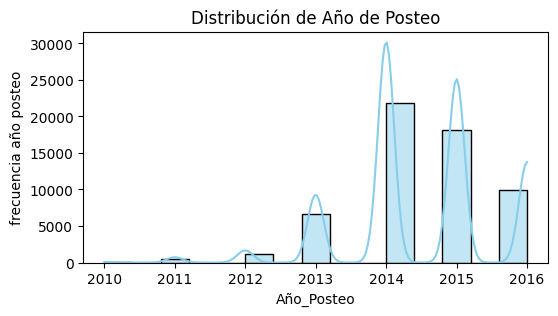

Cantidad de Posteos por Año:
Total : 58431 
2014    21834
2015    18154
2016     9933
2013     6713
2012     1201
2011      530
2010       66
Name: Año_Posteo, dtype: int64


In [21]:
# Distribución de la puntuación de análisis de sentimientos

# Crea variable para laas cantidades
frecuencia_año_posteo = df_user_reviews['Año_Posteo'].value_counts()

# Generacion de la imagen
plt.figure(figsize=(6, 3))
sns.histplot(df_user_reviews['Año_Posteo'], bins=15, kde=True, color='skyblue')
sns.set(style="darkgrid", context="notebook", palette="dark")

plt.title('Distribución de Año de Posteo')
plt.xlabel('Año_Posteo')
plt.ylabel('frecuencia año posteo')
plt.show()

print(f'Cantidad de Posteos por Año:\nTotal : {frecuencia_año_posteo.sum()} \n{frecuencia_año_posteo}')


Se puede ver como hay un incremeto notable en entre los años 2010-2014 teniendo su pico maximo en este ultimo, con un descenso posterior en
2015 y 2016 (en el cual se tiene que tener consideracion que no se tiene todos los datos del año) marcando una tendencia al descenso.

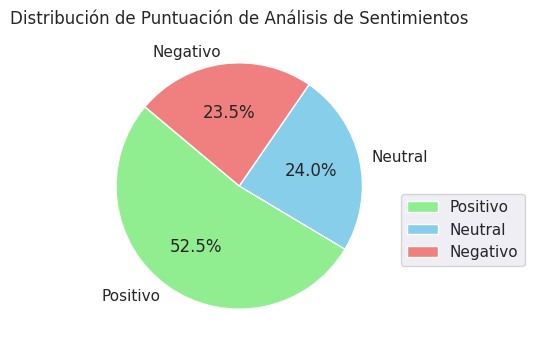

Cantidad de Recomendaciones:
Total : 58431 
Positivos : 30699
Neutrales : 14012
Negativos : 13720


In [22]:
# Frecuencia de la puntuación de análisis de sentimientos

# Crea variable para laas cantidades
frecuencia_sentimientos = df_user_reviews['Analisis_sentimientos'].value_counts()

# Definir etiquetas y colores
labels = ['Positivo', 'Neutral', 'Negativo']
colors = ['lightgreen', 'skyblue','lightcoral']

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(frecuencia_sentimientos, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Ajustes de etiquetas y títulos
plt.title('Distribución de Puntuación de Análisis de Sentimientos')

# Añadir leyenda
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

print(f'Cantidad de Recomendaciones:\nTotal : {frecuencia_sentimientos.sum()} \nPositivos : {frecuencia_sentimientos[2]}\nNeutrales : {frecuencia_sentimientos[0]}\nNegativos : {frecuencia_sentimientos[1]}')



Podemos observar que hay una mayoria de comentarios Positivos, podria deberse a un periodo de produccion con cantidad
de juego de buen nivel siendo mas de un tercio de los juegos aceptados de buena manera.

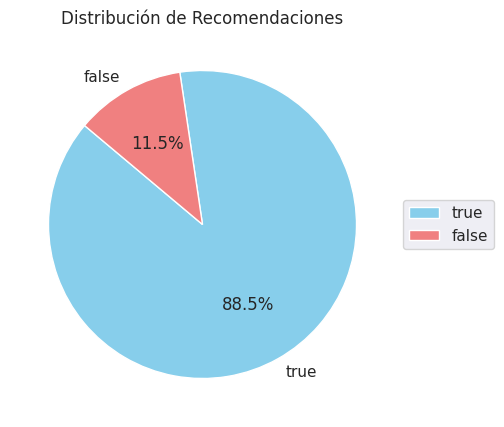

Cantidad de Recomendaciones:
Total : 58431 
true     51692
false     6739
Name: Recomendado, dtype: int64


In [23]:
# Distribución de la puntuación de análisis de sentimientos

# Crea variable para laas cantidades
frecuencia_recomendaciones = df_user_reviews['Recomendado'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(5, 5))

plt.pie(frecuencia_recomendaciones, labels=frecuencia_recomendaciones.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])

# Añadir leyenda al costado
plt.legend(frecuencia_recomendaciones.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustes de etiquetas y títulos
plt.title('Distribución de Recomendaciones')

# Mostrar el gráfico
plt.show()
print(f'Cantidad de Recomendaciones:\nTotal : {frecuencia_recomendaciones.sum()} \n{frecuencia_recomendaciones}')


Las Recomendaciones Positivas son  la mayor cantidad, hasta superando a la buena consideracion sobre los juegos de los usuarios en el porcentaje de comentarios.

In [24]:
frecuencia_recome = df_user_reviews.groupby('Año_Posteo')['Recomendado'].value_counts()
frecuencia_recome

Año_Posteo  Recomendado
2010        true              65
            false              1
2011        true             518
            false             12
2012        true            1189
            false             12
2013        true            6427
            false            286
2014        true           19830
            false           2004
2015        true           15528
            false           2626
2016        true            8135
            false           1798
Name: Recomendado, dtype: int64

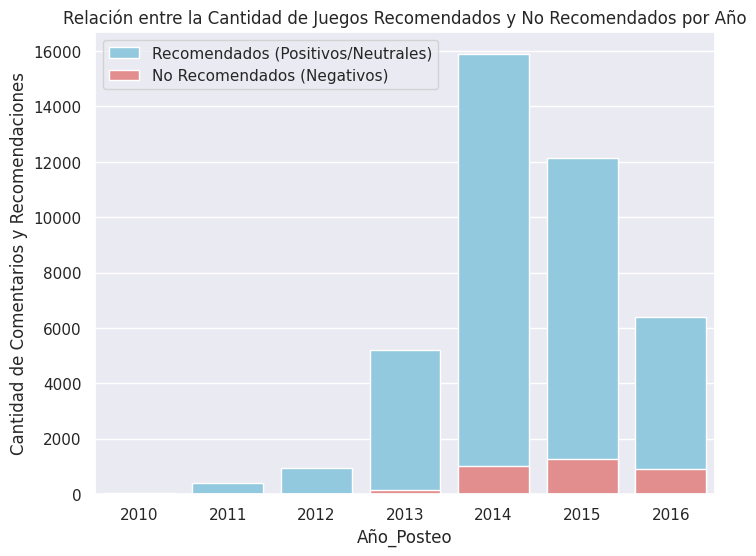

In [25]:
# Filtrar el DataFrame para juegos recomendados y con análisis de sentimientos positivos o neutrales
recomendados_positivos_neutrales = df_user_reviews[(df_user_reviews['Recomendado'] == 'true') & (df_user_reviews['Analisis_sentimientos'].isin([1, 2]))]

# Filtrar el DataFrame para juegos no recomendados y con análisis de sentimientos negativos
no_recomendados_negativos = df_user_reviews[(df_user_reviews['Recomendado'] == 'false') & (df_user_reviews['Analisis_sentimientos'] == 0)]

# Agrupar por año y contar la cantidad de juegos en cada categoría
recomendados_positivos_neutrales_por_año = recomendados_positivos_neutrales.groupby('Año_Posteo').size()
no_recomendados_negativos_por_año = no_recomendados_negativos.groupby('Año_Posteo').size()

# Completar con ceros si hay años sin datos
all_years = set(recomendados_positivos_neutrales['Año_Posteo']).union(set(no_recomendados_negativos['Año_Posteo']))
recomendados_positivos_neutrales_por_año = recomendados_positivos_neutrales_por_año.reindex(all_years, fill_value=0)
no_recomendados_negativos_por_año = no_recomendados_negativos_por_año.reindex(all_years, fill_value=0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid", context="notebook", palette="dark")
sns.barplot(x=recomendados_positivos_neutrales_por_año.index, y=recomendados_positivos_neutrales_por_año.values, color='skyblue', label='Recomendados (Positivos/Neutrales)')
sns.barplot(x=no_recomendados_negativos_por_año.index, y=no_recomendados_negativos_por_año.values, color='lightcoral', label='No Recomendados (Negativos)')

# Ajustes de etiquetas y títulos
plt.title('Relación entre la Cantidad de Juegos Recomendados y No Recomendados por Año')
plt.xlabel('Año_Posteo')
plt.ylabel('Cantidad de Comentarios y Recomendaciones')
plt.legend()

# Mostrar el gráfico
plt.show()


Hay una relacion Positiva en el aumento de la cantidad de Recomendacion y Comentarios de juegos, con las con las Recomendaciones favorables a un los mismos.









---


### Guardar el Nuevo DataFrame

In [26]:
# Guardar el DataFrame comprimido en Parquet
df_user_reviews.to_parquet('df_user_reviews_limpio.parquet')








---


---
## 2_ Steam Games



---

### Carga del DataFrame 'df_user_reviews' comprimido

In [27]:
#Se carga el archivo para trabajarlo
df_steam_games = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/PI_1/Data/df_steam_games.parquet')

---

### Descripcion General

In [28]:
df_steam_games.shape
print(f'El DataFrame posee la cnatidad de Filas igual a:{df_steam_games.shape[0]} y de Columnas : {df_steam_games.shape[1]}')

El DataFrame posee la cnatidad de Filas igual a:30067 y de Columnas : 14


In [29]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30067 entries, 0 to 30066
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Empresa_Publicadora  30067 non-null  object 
 1   Generos              30067 non-null  object 
 2   Nombre_Contenido     30067 non-null  object 
 3   Titulo               30067 non-null  object 
 4   Url                  30067 non-null  object 
 5   Fecha_Lanzamiento    30067 non-null  object 
 6   Etiquetas            30067 non-null  object 
 7   Reviews_Contenido    30067 non-null  object 
 8   Especificaciones     30067 non-null  object 
 9   Precio               30067 non-null  float64
 10  Acceso_Temprano      30067 non-null  float64
 11  Id_Item              30067 non-null  Int64  
 12  Desarrollador        30067 non-null  object 
 13  Año_Lanzamiento      29966 non-null  Int64  
dtypes: Int64(2), float64(2), object(10)
memory usage: 3.3+ MB


- El conjunto de datos df_steam_games contiene información sobre juegos disponibles en la plataforma Steam. Consta de 30067 entradas y 14 columnas, proporcionando detalles sobre el editor (Empresa_Publicadora), Generos, Nombre_Contenido, Titulo, Fecha_Lanzamiento, Etiquetas, URL de reseñas, especificaciones, precio, Acceso_Temprano, Id_Item, Desarrollador y Año_Lanzamiento. Algunos de los datos son nulos en columna como Año_Lanzamiento. Este conjunto de datos presenta una variedad de información que puede ser analizada para obtener perspectivas interesantes sobre los juegos en la plataforma Steam.


---


### **Descripcion del contenido de las columnas**

- Empresa_Publicadora: Empresa publicadora del contenido
- Generos: Genero del contenido               
- Nombre_Contenido: Nombre del contenido    
- Titulo: Titulo del contenido              
- Url: URL de publicación del contenido                 
- Fecha_Lanzamiento: Fecha de lanzamiento    
- Etiquetas: etiquetas de contenido            
- Reviews_Contenido: Reviews de contenido    
- Especificaciones: Especificaciones     
- Precio: Precio del contenido              
- Acceso_Temprano: acceso temprano      
- Id_Item: identificador unico de contenido              
- Desarrollador: Desarrollador        
- Año_Lanzamiento: Año_Lanzamiento     







---


### Variables

In [30]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30067 entries, 0 to 30066
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Empresa_Publicadora  30067 non-null  object 
 1   Generos              30067 non-null  object 
 2   Nombre_Contenido     30067 non-null  object 
 3   Titulo               30067 non-null  object 
 4   Url                  30067 non-null  object 
 5   Fecha_Lanzamiento    30067 non-null  object 
 6   Etiquetas            30067 non-null  object 
 7   Reviews_Contenido    30067 non-null  object 
 8   Especificaciones     30067 non-null  object 
 9   Precio               30067 non-null  float64
 10  Acceso_Temprano      30067 non-null  float64
 11  Id_Item              30067 non-null  Int64  
 12  Desarrollador        30067 non-null  object 
 13  Año_Lanzamiento      29966 non-null  Int64  
dtypes: Int64(2), float64(2), object(10)
memory usage: 3.3+ MB


In [31]:
# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['Generos'] = df_steam_games['Generos'].str.split(', ')
df_steam_games = df_steam_games.explode('Generos')
df_steam_games['Generos'] = df_steam_games['Generos'].str.split().str[0]


In [64]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74611 entries, 0 to 30066
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Generos           74611 non-null  object 
 1   Titulo            74611 non-null  object 
 2   Especificaciones  74611 non-null  object 
 3   Precio            74611 non-null  float32
 4   Id_Item           74611 non-null  int32  
 5   Desarrollador     74611 non-null  object 
 6   Año_Lanzamiento   74611 non-null  int32  
dtypes: float32(1), int32(2), object(4)
memory usage: 3.7+ MB


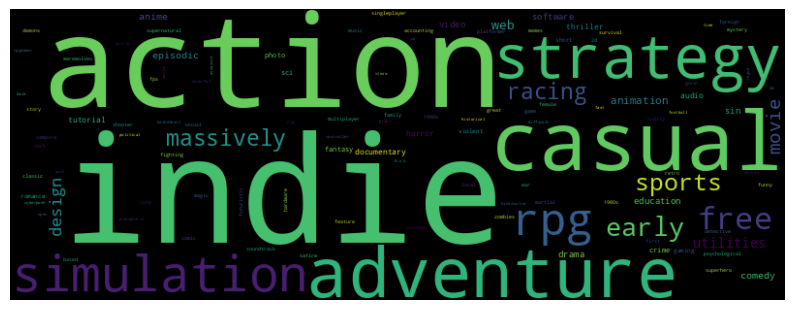


Top 5 generos mas frecuentes:
indie        15895
action       11546
casual        8288
adventure     8264
strategy      6957
Name: Generos, dtype: int64


In [32]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df_steam_games['Generos'].value_counts()
top_5_genero = frecuencia_genero.head(5)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print(f'\nTop 5 generos mas frecuentes:\n{top_5_genero}')

Mediante wordcloud es posible observar la frecuencia de los generos de manera indie, action,, casual, adventure, strategy, etc. permite darnos una idea inicial de cuales son los juegos mas adquiridos por los usuarios.


In [33]:
df_steam_games['Año_Lanzamiento'].describe()


count        74645.0
mean     2015.224369
std        20.903302
min           1970.0
25%           2015.0
50%           2016.0
75%           2017.0
max           5275.0
Name: Año_Lanzamiento, dtype: Float64

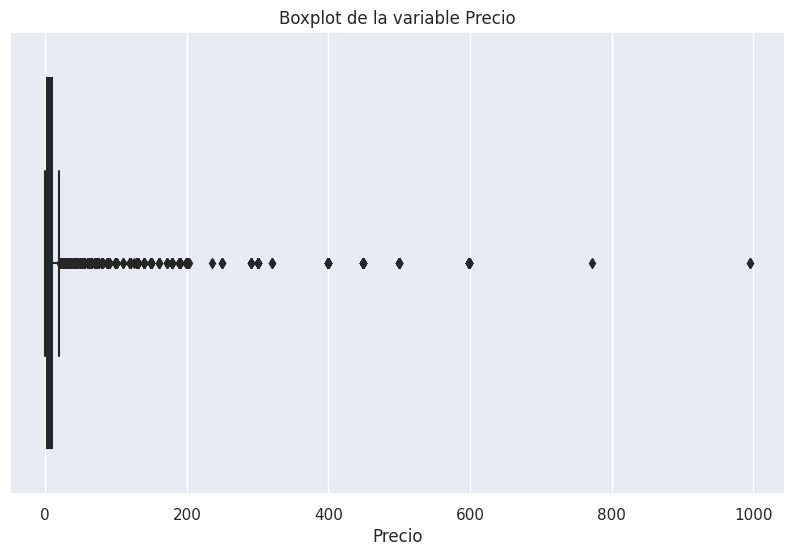

             Precio
count  71728.000000
mean       8.886524
std       19.359430
min        0.000000
25%        2.990000
50%        4.990000
75%        9.990000
max      995.000000

Límite inferior para outliers: -7.51
Límite superior para outliers: 20.490000000000002
Número de outliers: 4146
Valores de outliers:
 7        29.99
7        29.99
7        29.99
7        29.99
16       59.99
         ...  
30010    29.99
30010    29.99
30010    29.99
30031    29.99
30031    29.99
Name: Precio, Length: 4146, dtype: float64


In [34]:

# Analiza las variables numericas Precio
estadistica_precio = df_steam_games[df_steam_games['Precio'] != -1][['Precio']].describe()

# Filtra el DataFrame y selecciona la columna 'Precio'
filtered_df = df_steam_games[df_steam_games['Precio'] != -1][['Precio']]

# Crea el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Precio'])

# Agrega título y etiquetas
plt.title('Boxplot de la variable Precio')
plt.xlabel('Precio')

# Mostrar el boxplot
plt.show()

print(estadistica_precio)

# Filtrar el DataFrame y seleccionar la columna 'Precio'
filtro_outliers = df_steam_games[df_steam_games['Precio'] != -1]['Precio']

# Calcular el primer y tercer cuartil
C1 = filtro_outliers.quantile(0.25)
C3 = filtro_outliers.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = C3 - C1

# Calcular los límites para los outliers
lower_bound = C1 - 1.5 * IQR
upper_bound = C3 + 1.5 * IQR

# Identificar los outliers
outliers = filtro_outliers[(filtro_outliers < lower_bound) | (filtro_outliers > upper_bound)]

# Imprimir los resultados
print("\nLímite inferior para outliers:", lower_bound)
print("Límite superior para outliers:", upper_bound)
print("Número de outliers:", len(outliers))
print("Valores de outliers:\n", outliers)



- El precio promedio de los juegos es de aproximadamente 8.87 dolares y la desviación estándar es alta (16.35), indicando una variabilidad significativa en los precios. El precio mínimo es 0, lo que sugiere que algunos juegos son gratuitos. El 75% de los juegos tienen un precio igual o inferior a 9.99 unidades monetarias, cercano al del promedio. El precio máximo es 995 dolares lo que puede indicar a que es un juego Premiun, para desarrolladores.

In [35]:
# Se busca el juego con un año erroneo
año_erroneo = df_steam_games[df_steam_games['Año_Lanzamiento'] == 5275]
año_erroneo

,Empresa_Publicadora,Generos,Nombre_Contenido,Titulo,Url,Fecha_Lanzamiento,Etiquetas,Reviews_Contenido,Especificaciones,Precio,Acceso_Temprano,Id_Item,Desarrollador,Año_Lanzamiento
12561,一次元创作组,casual,puzzle sisters foer,puzzle sisters foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,"early access, casual, indie",http://steamcommunity.com/app/710190/reviews/?...,"single player, steam achievements, steam tradi...",-1.0,1.0,710190,一次元创作组,5275
12561,一次元创作组,indie,puzzle sisters foer,puzzle sisters foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,"early access, casual, indie",http://steamcommunity.com/app/710190/reviews/?...,"single player, steam achievements, steam tradi...",-1.0,1.0,710190,一次元创作组,5275
12561,一次元创作组,early,puzzle sisters foer,puzzle sisters foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,"early access, casual, indie",http://steamcommunity.com/app/710190/reviews/?...,"single player, steam achievements, steam tradi...",-1.0,1.0,710190,一次元创作组,5275


In [36]:
# Se elimina la fila con el año erroneo
df_steam_games = df_steam_games.drop(12561)







---


### Valores Nulos

In [37]:
df_steam_games.isna().sum()

Empresa_Publicadora      0
Generos                  0
Nombre_Contenido         0
Titulo                   0
Url                      0
Fecha_Lanzamiento        0
Etiquetas                0
Reviews_Contenido        0
Especificaciones         0
Precio                   0
Acceso_Temprano          0
Id_Item                  0
Desarrollador            0
Año_Lanzamiento        285
dtype: int64

In [38]:
# Filtrar las filas donde 'Año_Lanzamiento' es nulo
filas_sin_año = df_steam_games[df_steam_games['Año_Lanzamiento'].isna()]
filas_sin_año


,Empresa_Publicadora,Generos,Nombre_Contenido,Titulo,Url,Fecha_Lanzamiento,Etiquetas,Reviews_Contenido,Especificaciones,Precio,Acceso_Temprano,Id_Item,Desarrollador,Año_Lanzamiento
9,qucheza,action,uncanny islands,uncanny islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"early access, action, indie, simulation, survival",http://steamcommunity.com/app/768570/reviews/?...,single player,-1.0,1.0,768570,qucheza,<NA>
9,qucheza,indie,uncanny islands,uncanny islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"early access, action, indie, simulation, survival",http://steamcommunity.com/app/768570/reviews/?...,single player,-1.0,1.0,768570,qucheza,<NA>
9,qucheza,simulation,uncanny islands,uncanny islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"early access, action, indie, simulation, survival",http://steamcommunity.com/app/768570/reviews/?...,single player,-1.0,1.0,768570,qucheza,<NA>
9,qucheza,early,uncanny islands,uncanny islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"early access, action, indie, simulation, survival",http://steamcommunity.com/app/768570/reviews/?...,single player,-1.0,1.0,768570,qucheza,<NA>
36,zha7,adventure,idle adventure,idle adventure,http://store.steampowered.com/app/714020/Idle_...,Beta测试已开启,"early access, free to play, adventure, rpg",http://steamcommunity.com/app/714020/reviews/?...,"mmo, steam achievements",-1.0,1.0,714020,"zha7,phaedruns,yingke wu",<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29951,new blood interactive,indie,dusk,dusk,http://store.steampowered.com/app/519860/DUSK/,SOON™,"action, fps, indie, retro, shooter, horror, go...",http://steamcommunity.com/app/519860/reviews/?...,"single player, online multi player, steam achi...",20.0,0.0,519860,david szymanski,<NA>
30021,"greyson richey, nicholas lives",action,lonely astronaut,lonely astronaut,http://store.steampowered.com/app/755830/Lonel...,Coming Soon,"casual, action, indie, simulation",http://steamcommunity.com/app/755830/reviews/?...,single player,-1.0,0.0,755830,"greyson richey,nicholas lives",<NA>
30021,"greyson richey, nicholas lives",casual,lonely astronaut,lonely astronaut,http://store.steampowered.com/app/755830/Lonel...,Coming Soon,"casual, action, indie, simulation",http://steamcommunity.com/app/755830/reviews/?...,single player,-1.0,0.0,755830,"greyson richey,nicholas lives",<NA>
30021,"greyson richey, nicholas lives",indie,lonely astronaut,lonely astronaut,http://store.steampowered.com/app/755830/Lonel...,Coming Soon,"casual, action, indie, simulation",http://steamcommunity.com/app/755830/reviews/?...,single player,-1.0,0.0,755830,"greyson richey,nicholas lives",<NA>


In [39]:
# Calcular el porcentaje de filas con valores nulos en 'Año_Lanzamiento'
porcentaje_filas_sin_año = (len(filas_sin_año) / len(df_steam_games)) * 100

# Imprimir el resultado
print(f'El total de Filas sin año: {len(filas_sin_año)} \nEl total de Filas: {len(df_steam_games)} \nPorcentaje de filas sin año: {porcentaje_filas_sin_año:.2f}%')


El total de Filas sin año: 285 
El total de Filas: 74927 
Porcentaje de filas sin año: 0.38%


In [40]:
# Eliminar filas sin años del DataFrame
df_steam_games = df_steam_games.dropna(subset=['Año_Lanzamiento'])

- A ser el porcentaje bajo de datos sin año, con futuro lanzamiento, se proceden a eliminar, ya que son juegos que no salieron a la venta.







---


### Columnas

In [41]:
# Eliminar columnas
df_steam_games = df_steam_games.drop(['Empresa_Publicadora', 'Nombre_Contenido', 'Url', 'Fecha_Lanzamiento', 'Etiquetas', 'Reviews_Contenido', 'Acceso_Temprano',], axis=1)

- Se procede a eliminar las columnas Empresa_Publicadora', 'Url', 'Fecha_Lanzamiento', 'Etiquetas', 'Reviews_Contenido', 'Acceso_Temprano'debido a que tiene valores informacion redundante y no relevante para el analisis respectivo.







---


### Valores duplicados

In [42]:
# Se cuentan el total de duplicados y se los elimina
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_steam_games.shape}')
df_steam_games.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_steam_games.shape}')

Tamaño del set antes de eliminar las filas repetidas: (74642, 7)
Tamaño del set después de eliminar las filas repetidas: (74611, 7)








---


### Guardado del DataFrame

In [43]:
# Guardar el DataFrame comprimido en Parquet
df_steam_games.to_parquet('df_steam_games_limpio.parquet')






---



---


## **3_ User Items**

  
---

### Carga del DataFrame 'df_user_reviews' comprimido

In [44]:
# Se carga el archivo
df_user_items = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/PI_1/Data/df_user_items.parquet')

---

### Descripcion General

In [45]:
df_user_items.shape
print(f'El DataFrame posee la cantidad de Filas igual a:{df_user_items.shape[0]} y de Columnas : {df_user_items.shape[1]}')

El DataFrame posee la cantidad de Filas igual a:5153209 y de Columnas : 8


In [46]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Id_Usuario               object 
 1   Conteo_Items             int64  
 2   Id_Steam                 object 
 3   Url_Usuario              object 
 4   Id_Item                  int64  
 5   Nombre_Juego             object 
 6   Tiempo_Jugado            float64
 7   Tiempo_Jugado_2_Semanas  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 314.5+ MB


 El DataFrame df_user_items contiene información detallada sobre la actividad de los usuarios en relación con los ítems de un juego. Cada fila representa una entrada única que indica cuántas veces un usuario ha interactuado con un determinado ítem del juego y la cantidad de tiempo dedicado a ese ítem.




---


### **Descripcion del contenido de las columnas**


- Id_Usuario: Identificación única del usuario.
- Conteo_Items: Cantidad total de ítems que el usuario ha interactuado.
- Id_Steam: Identificación única del ítem.
- Url_Usuario: URL perfil del usuario.
- Id_Item: ID del juego.
- Nombre_Juego: Nombre del titulo
- Tiempo_Jugado: Tiempo total de juego dedicado al ítem por el usuario (en horas).
- Tiempo_Jugado_2_Semanas: Tiempo de juego dedicado al ítem en las últimas dos semanas (en horas).





---


### Variables

In [47]:
# Modificar el tipo de archivo de la columna 'Id_Item' a INT
df_user_items['Id_Item'] = df_user_items['Id_Item'].astype(int)
df_user_items['Tiempo_Jugado'] = df_user_items['Tiempo_Jugado'].astype(int)

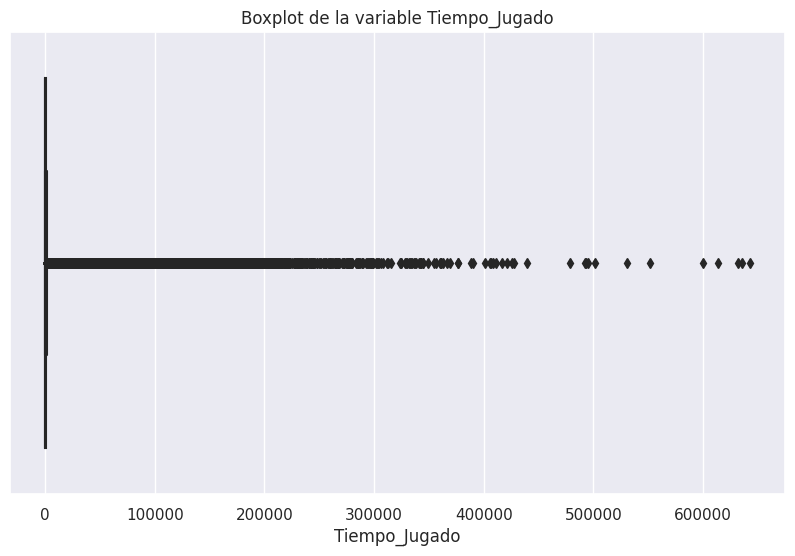

count    3.285246e+06
mean     1.555251e+03
std      6.721032e+03
min      1.000000e+00
25%      4.400000e+01
50%      2.050000e+02
75%      8.080000e+02
max      6.427730e+05
Name: Tiempo_Jugado, dtype: float64

Límite inferior para outliers: -1102.0
Límite superior para outliers: 1954.0
Número de outliers: 436754
Valores de outliers:
 8           4733
16          2685
46         10006
48          4413
65          3061
           ...  
5152618     3172
5152638     2184
5152651     2317
5152652     2987
5153000     4557
Name: Tiempo_Jugado, Length: 436754, dtype: int64


In [48]:
# Filtrar el DataFrame y seleccionar la columna 'Tiempo_Jugado'
filtered_df = df_user_items[df_user_items['Tiempo_Jugado'] != 0]['Tiempo_Jugado']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df)

# Agregar título y etiquetas
plt.title('Boxplot de la variable Tiempo_Jugado')
plt.xlabel('Tiempo_Jugado')

# Mostrar el boxplot
plt.show()

# Mostrar estadísticas descriptivas
print(filtered_df.describe())

# Filtrar el DataFrame y seleccionar la columna 'Precio'
filtro_outliers = df_user_items[df_user_items['Tiempo_Jugado'] != 0]['Tiempo_Jugado']

# Calcular el primer y tercer cuartil
C1 = filtro_outliers.quantile(0.25)
C3 = filtro_outliers.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = C3 - C1

# Calcular los límites para los outliers
lower_bound = C1 - 1.5 * IQR
upper_bound = C3 + 1.5 * IQR

# Identificar los outliers
outliers = filtro_outliers[(filtro_outliers < lower_bound) | (filtro_outliers > upper_bound)]

# Imprimir los resultados
print("\nLímite inferior para outliers:", lower_bound)
print("Límite superior para outliers:", upper_bound)
print("Número de outliers:", len(outliers))
print("Valores de outliers:\n", outliers)

- La media de tiempo jugado es 1,555.25 horas, lo que indica que, en promedio, los usuarios han invertido bastante tiempo en los juegos.
- La desviación estándar de 6,721.03 horas sugiere una gran variabilidad en los datos. Algunos usuarios pueden jugar durante períodos extremadamente largos, mientras que otros juegan por períodos más cortos.
- El valor mínimo de 1 hora indica que hay usuarios que han jugado por un tiempo muy breve, posiblemente solo probando el juego.
- El 25° percentil de 44 horas indica que el 25% de los usuarios han jugado menos de 44 horas, mientras que el 75° percentil de 808 horas indica que el 75% de los usuarios han jugado menos de 808 horas.
- El máximo de 642,773 horas sugiere la presencia de valores atípicos significativos. Podrían ser usuarios extremadamente dedicados o posiblemente errores en la recopilación de datos. Se recomienda una revisión más detallada de estos casos.

---


### Valores Nulos

In [49]:
# Se buscan valores nulos
df_user_items.isna().sum()

Id_Usuario                 0
Conteo_Items               0
Id_Steam                   0
Url_Usuario                0
Id_Item                    0
Nombre_Juego               0
Tiempo_Jugado              0
Tiempo_Jugado_2_Semanas    0
dtype: int64

- No se observan Valores Nulos en las columnas.

---


### Columnas

In [50]:
# Eliminar columnas
df_user_items = df_user_items.drop(['Conteo_Items', 'Id_Steam', 'Url_Usuario'] , axis=1)

- Se elimina las columnas 'Conteo_Items', 'Id_Steam', 'Url_Usuario' debido a que tiene valores informacion redundante y no relevante para el analisis respectivo.

---


### Valores duplicados

In [51]:
# Se cuentan los valores duplicados
valores_duplicados = df_user_items.duplicated().sum()
print(f'Cantidad de valores duplicados: {valores_duplicados}')

Cantidad de valores duplicados: 59104


In [52]:
# Se eliminan los valores duplicados
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_user_items.shape}')
df_user_items.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_user_items.shape}')

Tamaño del set antes de eliminar las filas repetidas: (5153209, 5)
Tamaño del set después de eliminar las filas repetidas: (5094105, 5)


---


### Guardado del DataFrame

In [53]:
# Guardar el DataFrame comprimido en Parquet
df_user_items.to_parquet('df_user_items_limpio.parquet')



---
### Crear un DataFrame unificado


In [54]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5094105 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Id_Usuario               object 
 1   Id_Item                  int64  
 2   Nombre_Juego             object 
 3   Tiempo_Jugado            int64  
 4   Tiempo_Jugado_2_Semanas  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 233.2+ MB


In [55]:
# Se modifica el tipo de variable para ocupar menos memoria
df_user_items[['Id_Item', 'Tiempo_Jugado']] = df_user_items[['Id_Item', 'Tiempo_Jugado']].astype('int32')

In [56]:
# Se elimina las columnas que no seran utiles para el analisis
df_user_items = df_user_items.drop(columns=['Id_Usuario', 'Nombre_Juego', 'Tiempo_Jugado_2_Semanas'])
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5094105 entries, 0 to 5153208
Data columns (total 2 columns):
 #   Column         Dtype
---  ------         -----
 0   Id_Item        int32
 1   Tiempo_Jugado  int32
dtypes: int32(2)
memory usage: 77.7 MB


In [57]:
# Agrupar por 'Id_Item' y sumar el tiempo jugado
resultados_agrupados = df_user_items.groupby('Id_Item')['Tiempo_Jugado'].sum()

In [58]:
# Convertir la Serie a DataFrame y resetear el índice
df_user_items = resultados_agrupados.reset_index()

# Imprimir los primeros resultados del nuevo DataFrame
print(df_user_items.head())


   Id_Item  Tiempo_Jugado
0       10       17107858
1       20         960524
2       30         756375
3       40         154424
4       50         726545


In [59]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58431 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id_Usuario             58431 non-null  object
 1   Id_Item                58431 non-null  int64 
 2   Recomendado            58431 non-null  object
 3   Comentarios            58431 non-null  object
 4   Analisis_sentimientos  58431 non-null  int64 
 5   Año_Posteo             58431 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [60]:
# Se modifica el tipo de variable para ocupar menos memoria
df_user_reviews[['Id_Item', 'Analisis_sentimientos', 'Año_Posteo']] = df_user_reviews[['Id_Item', 'Analisis_sentimientos', 'Año_Posteo']].astype('int32')

In [61]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74611 entries, 0 to 30066
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Generos           74611 non-null  object 
 1   Titulo            74611 non-null  object 
 2   Especificaciones  74611 non-null  object 
 3   Precio            74611 non-null  float64
 4   Id_Item           74611 non-null  Int64  
 5   Desarrollador     74611 non-null  object 
 6   Año_Lanzamiento   74611 non-null  Int64  
dtypes: Int64(2), float64(1), object(4)
memory usage: 4.7+ MB


In [62]:
# Se modifica el tipo de variable para ocupar menos memoria
df_steam_games[['Id_Item', 'Año_Lanzamiento']] = df_steam_games[['Id_Item', 'Año_Lanzamiento']].astype('int32')
df_steam_games['Precio'] = df_steam_games['Precio'].astype('float32')

In [65]:
# Unificar los DataFrame para el analisis
df_eda = df_user_items.merge(df_steam_games, on='Id_Item', how='inner')

In [66]:
# Unificar los DataFrame para el analisis
df_eda = df_eda.merge(df_user_reviews, on='Id_Item', how='inner')

In [67]:
# Se elimina columnas que no se utlizaran para el posterior analisis
df_eda = df_eda.drop(columns=['Especificaciones', 'Id_Usuario','Comentarios'])

---


### Guardado del DataFrame

In [70]:
# Guardar el DataFrame comprimido en Parquet
df_eda.to_parquet('df_eda_limpio.parquet')